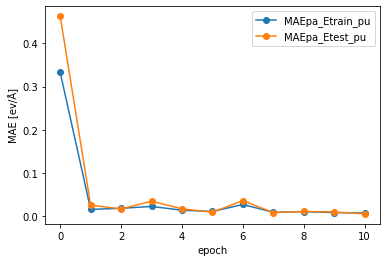

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

def plot_loss(file_path, column_name):
    txt = open(file_path, 'r').readlines()
    columns = [s for s in txt if re.match('#\s*epoch.*', s)][0].split()[1:]
    extract_loss = [s for s in txt if re.match('\s*\d\s*.*', s)]
    loss = [s.split() for s in extract_loss]
    df = pd.DataFrame(loss)
    df.columns = columns
    for col in df.columns:
        if col == 'epoch':
            df[col] = df[col].astype(int)
        else:
            df[col] = df[col].astype(float)

    plt.plot(df['epoch'], df[column_name], label=column_name,marker='o')
    
plt.figure()
plot_loss('./learning-curve.out','MAEpa_Etrain_pu')
plot_loss('./learning-curve.out','MAEpa_Etest_pu')
plt.xlabel('epoch')
plt.ylabel('MAE [ev/Å]')
plt.legend()

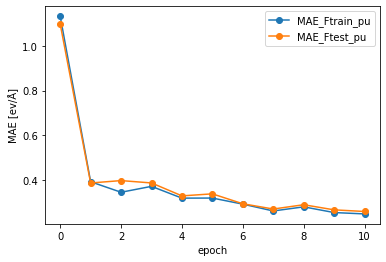

In [3]:
plt.figure()
plot_loss('./learning-curve.out','MAE_Ftrain_pu')
plot_loss('./learning-curve.out','MAE_Ftest_pu')
plt.xlabel('epoch')
plt.ylabel('MAE [ev/Å]')
plt.legend()